### 导入必要的库

In [ ]:
import NewareNDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 读取电池文件

In [4]:
data = NewareNDA.read("FullCell.ndax")
data

,Index,Cycle,Step,Step_Index,Status,Time,Voltage,Current(mA),Charge_Capacity(mAh),Discharge_Capacity(mAh),Charge_Energy(mWh),Discharge_Energy(mWh),Timestamp
0,1,1,1,1,Rest,0.0,1.3240,0.0000,0.0,0.000000,0.0,0.000000,2024-06-27 17:39:17
1,2,1,1,1,Rest,10.0,1.3239,0.0000,0.0,0.000000,0.0,0.000000,2024-06-27 17:39:26
2,3,1,1,1,Rest,20.0,1.3238,0.0000,0.0,0.000000,0.0,0.000000,2024-06-27 17:39:36
3,4,1,1,1,Rest,30.0,1.3238,0.0000,0.0,0.000000,0.0,0.000000,2024-06-27 17:39:46
4,5,1,1,1,Rest,40.0,1.3238,0.0000,0.0,0.000000,0.0,0.000000,2024-06-27 17:39:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109277,109278,213,426,5,CC_DChg,10.0,0.9542,-9.8979,0.0,0.027494,0.0,0.033601,2024-06-29 01:42:29
109278,109279,213,426,5,CC_DChg,11.0,0.8212,-9.8980,0.0,0.030244,0.0,0.035859,2024-06-29 01:42:30
109279,109280,213,426,5,CC_DChg,12.0,0.6552,-9.8981,0.0,0.032993,0.0,0.037660,2024-06-29 01:42:31
109280,109281,213,426,5,CC_DChg,13.0,0.4154,-9.8980,0.0,0.035743,0.0,0.038802,2024-06-29 01:42:32


Text(0.5, 1.0, 'Charge and Discharge Capacity vs Voltage')

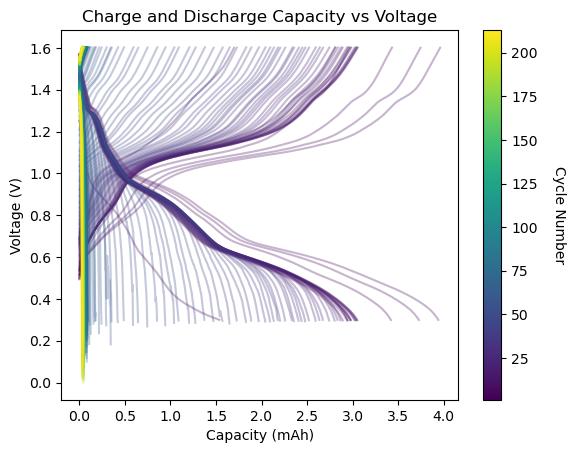

In [48]:
cycles = data['Cycle'].unique()
rooms = data.groupby('Cycle')
norm = plt.Normalize(vmin=cycles.min(), vmax=cycles.max())
cmap = plt.cm.viridis
for cycle, group in rooms:
    dis_vol = group['Voltage'][group['Current(mA)'] < 0].values
    dis_cap = group['Discharge_Capacity(mAh)'][group['Current(mA)'] < 0].values
    ch_vol = group['Voltage'][group['Current(mA)'] > 0].values
    ch_cap = group['Charge_Capacity(mAh)'][group['Current(mA)'] > 0].values
    color = cmap(cycle / cycles.max())
    sc = plt.plot(ch_cap, ch_vol, color=plt.cm.viridis(cycle / data['Cycle'].max()), alpha=0.3)
    sc = plt.plot(dis_cap, dis_vol, color=plt.cm.viridis(cycle / data['Cycle'].max()), alpha=0.3)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Cycle Number', rotation=270, labelpad=20)
plt.xlabel('Capacity (mAh)')
plt.ylabel('Voltage (V)')
plt.title('Charge and Discharge Capacity vs Voltage')

Text(0.5, 1.0, 'Charge and Discharge Capacity vs Cycle Number')

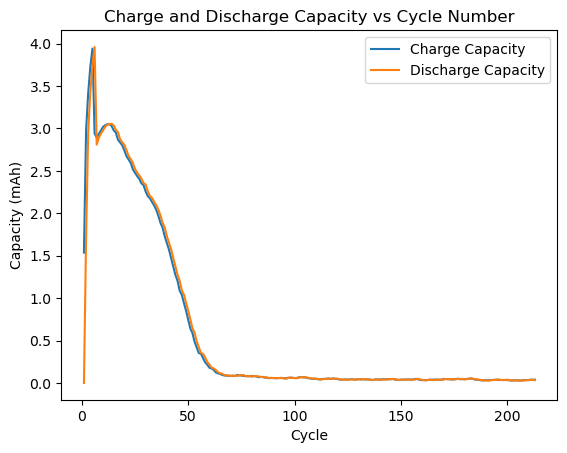

In [49]:
ch_cap = rooms['Discharge_Capacity(mAh)'].max()
dis_cap = rooms['Charge_Capacity(mAh)'].max()
plt.plot(cycles, ch_cap)
plt.plot(cycles, dis_cap)
plt.xlabel('Cycle')
plt.ylabel('Capacity (mAh)')
plt.legend(['Charge Capacity', 'Discharge Capacity'])
plt.title('Charge and Discharge Capacity vs Cycle Number')